# Lista 7 - Knapsack - Programação Dinâmica

## Solução do problema

### Funções

In [1]:
def knapSack(W, n, val, wt):
    v = [[0] * (W+1) for _ in range(n+1)]
    taken_matrix = [[False] * (W+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for w in range(1, W+1):
            not_taking = v[i-1][w]
            v[i][w] = not_taking

            if wt[i] <= w:
                taking = val[i] + v[i-1][w - wt[i]]
                
                if taking >= not_taking:
                    taken_matrix[i][w] = True
                    v[i][w] = taking    

    return taken_matrix, v
            
def reconstruct(taken_matrix, W, n, val, wt):
    itens = []
    taken_matrix_individual = [[False] * (W+1) for _ in range(n+1)]

    for i in range(n, -1, -1):
        if taken_matrix[i][W]:
            taken_matrix_individual[i][W] = True
            W -= wt[i]
            itens += [i]
    return itens, taken_matrix_individual

### Execução e relatório

In [2]:
import random

MAX_ITENS, MAX_WEIGHT = 15, 25
MIN_ITENS, MIN_WEIGTH = 4, 20

n = int(random.random()*100)%(MAX_ITENS - MIN_ITENS) + (MIN_ITENS)
W = int(random.random()*100)%(MAX_WEIGHT - MIN_WEIGTH) + (MIN_WEIGTH)
val = [int(random.random()*100)+1 for _ in range(n+1)]
wt = [int(random.random()*100)%40+1 for _ in range(n+1)]

print("O máximo de peso que se pode carregar é '{}'.".format(W), end='\n\n')
print('Os itens disponíveis são:')
for item in range(1, len(val)):
    print('\t\tItem: {:2d}, Valor: {:02d}, Peso: {:02d}'.format(item, val[item], wt[item]))

taken_matrix, knapsack_matrix = knapSack(W, n, val, wt)
taken_idxs, taken_matrix_individual = reconstruct(taken_matrix, W, n, val, wt)

taken_vals = [val[i] for i in taken_idxs]
taken_weigths = [wt[i] for i in taken_idxs]

print("\nO máximo que se pode carregar em valor é '{}' com um peso de '{}Kg', com os itens: '{}'.".format(sum(taken_vals), sum(taken_weigths), ', '.join(map(str, taken_idxs))))

O máximo de peso que se pode carregar é '22'.

Os itens disponíveis são:
		Item:  1, Valor: 100, Peso: 07
		Item:  2, Valor: 72, Peso: 18
		Item:  3, Valor: 11, Peso: 19
		Item:  4, Valor: 52, Peso: 35
		Item:  5, Valor: 79, Peso: 18
		Item:  6, Valor: 36, Peso: 20
		Item:  7, Valor: 73, Peso: 20
		Item:  8, Valor: 97, Peso: 31
		Item:  9, Valor: 50, Peso: 01
		Item: 10, Valor: 24, Peso: 29
		Item: 11, Valor: 14, Peso: 16
		Item: 12, Valor: 97, Peso: 13

O máximo que se pode carregar em valor é '247' com um peso de '21Kg', com os itens: '12, 9, 1'.


### Ilustração da solução

#### Tabela de valores escolhidos: Número de itens X Peso Máximo com itens selecionados destacados

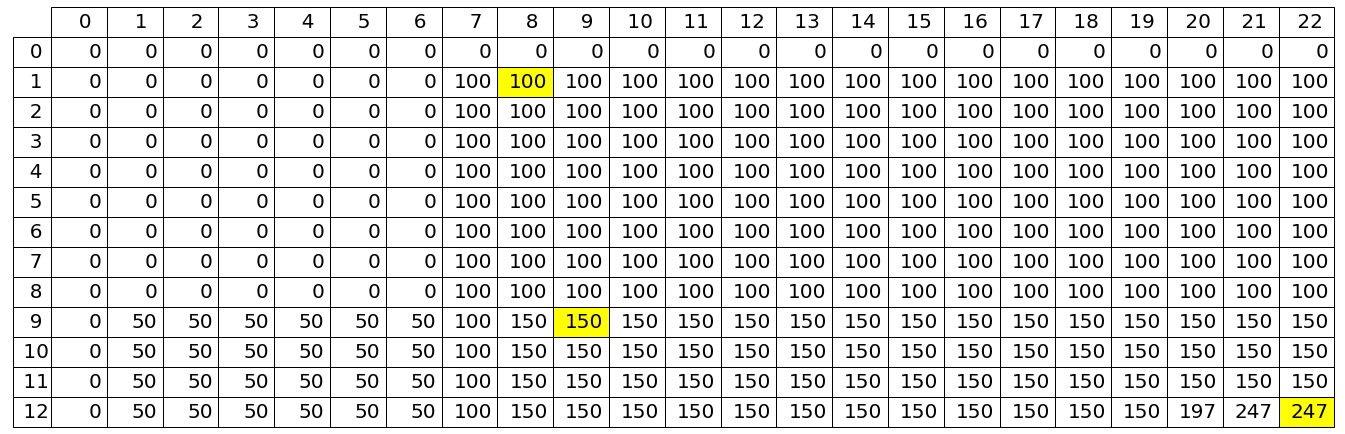

In [10]:
import matplotlib.pyplot as plt

data = knapsack_matrix

columns = ['{:3d}'.format(x) for x in range(len(data[0]))]
rows = ['{:3d}'.format(x) for x in range(len(data))]

# Get some pastel shades for the colors
colors = [["#ffff00" if taken_matrix_individual[i][j] else "w" for j in range(len(data[0])) ] for i in range(len(data))]
fig=plt.figure(figsize=(len(data[0]), 2))

ax = plt.gca()
ax.axis('tight')
ax.axis('off')
the_table = plt.table(cellText=data, rowLabels=rows, colLabels=columns, cellColours=colors, loc='center')
the_table.scale(1, 2.5)
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
plt.show()

In [4]:
import random

knapsack_capacity = W
items_picked = taken_idxs
wt = wt

nrows, ncols = 1, knapsack_capacity
random_colors = [random.uniform(0, 10) for x in range(len(wt[1:]))]

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def update_image(image):
    row_labels = range(nrows, 0, -1)
    col_labels = range(1, ncols+1)
    
    im = plt.matshow(image, vmin=0, vmax=10, cmap='Set1', aspect='auto')
    colors = [im.cmap(im.norm(i)) for i in random_colors]
    
    plt.xticks([0.5 + i for i in range(ncols)], col_labels)
    plt.yticks([], row_labels)
    
    patches = [mpatches.Patch(color=colors[i], label="Item {:2d}, Peso {:02d}".format(i+1, j) ) for i, j in enumerate(wt[1:]) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

In [6]:
import numpy as np

def build_knapsack(list_height_boards):
    image = np.zeros(nrows*ncols)
    image = image.reshape((nrows, ncols))
    return image

#### Bolsa vazia

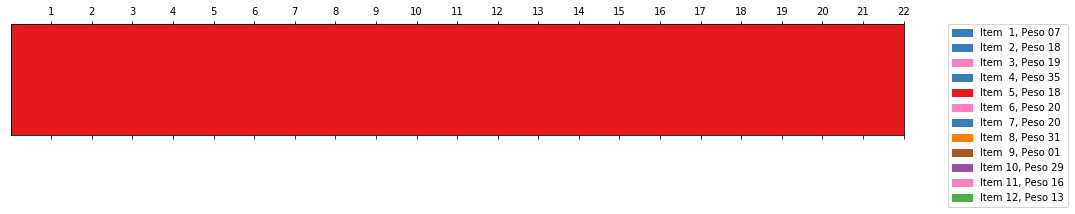

In [7]:
import numpy as np

image = build_knapsack(knapsack_capacity)
update_image(image)

In [8]:
used_capacity = 0

def execute_commands(item, img_target):
    global used_capacity

    for i in range(wt[item]):
        if used_capacity + wt[item] <= knapsack_capacity and img_target[0, i+used_capacity] < min(random_colors):
            img_target[0, i+used_capacity] = random_colors[item-1]
    used_capacity += wt[item]
    return img_target

#### Preenchimento com os itens

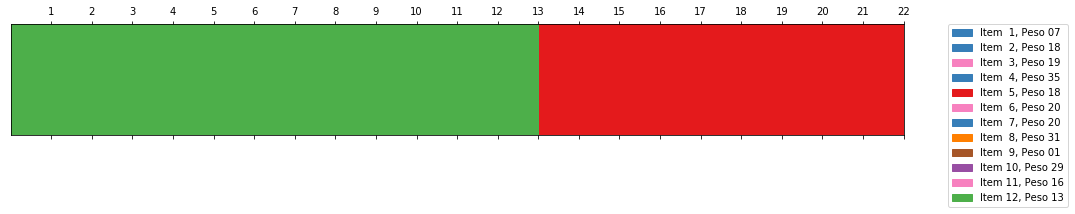

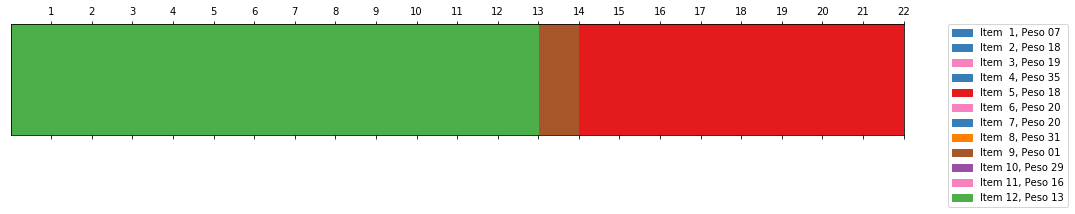

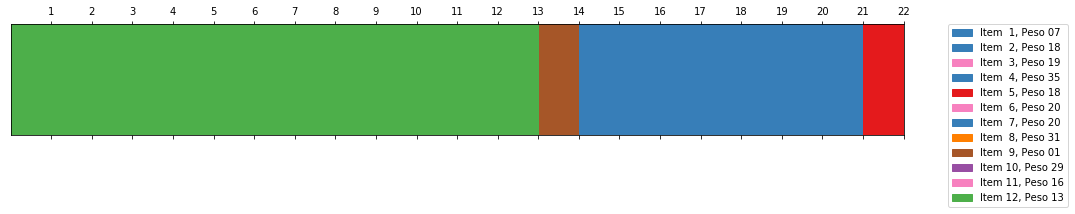

In [9]:
for i in items_picked:
    image = execute_commands(i, image)
    update_image(image)